# 합성곱 신경망(CNN)
- convolutional neural network

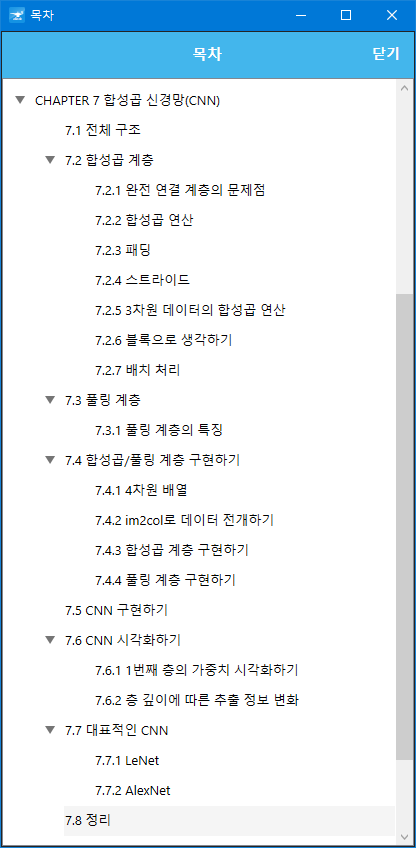

## 7.1 전체구조
+ 이전의 신경망과 같이 계층을 조합하여 만들 수 있음
+ 합성곱계층(Convolutional layer)과 풀링계층(Pooling layer)이 등장
+ 완전연결층(fully conneted) : 인접하는 계층의 모든 뉴런과 결합된 신경망
+ CNN의 구조 (합성곱과 풀링계층 추가)

[그림 7-1] 완전연결 계층(Affine 계층)으로 이뤄진 네트워크의 예

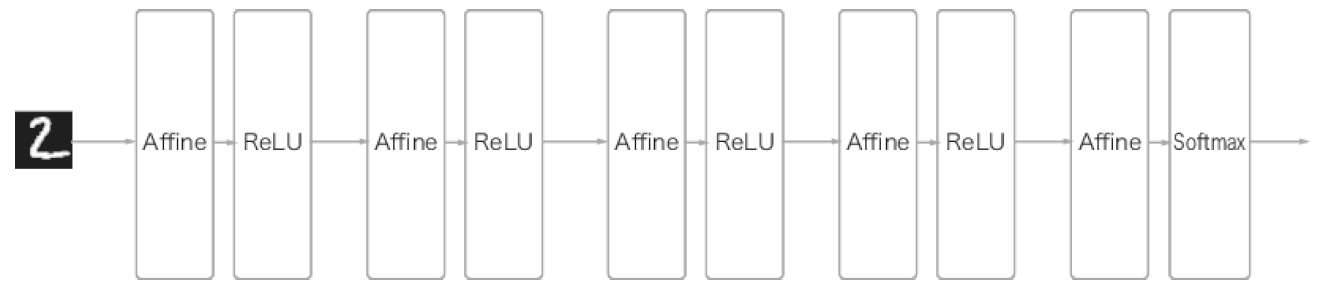


[그림 7-2] CNN으로 이뤄진 네트워크의 예
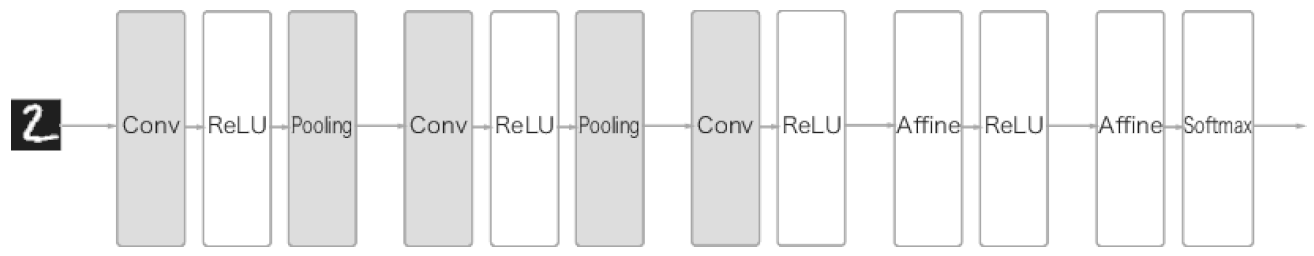

## 7.2 합성곱 계층
 - 패딩, 스트라이드등 CNN 고유의 용어 등장

### 7.2.1 완전연결 계층의 문제점
 - 데이터의 형상이 무시됨 : 3차원 데이터를 1차원 데이터로 평탄화 해야 함
     - 이미지의 형상에는 공간적 정보가 담겨져 있음
     - 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB 각 채널은 서로 밀접하게 관련, 3차원 속에서 의미를 갖는 본질적인 패턴이 숨어져 있을 것
 - CNN의 합성곱계층은 형상을 유지
 - CNN에서는 입출력 데이터를 feature map(특징 맵)이라 함
      - input feature map
      - output feature map

### 7.2.2 합성곱 연산
[그림 7-3] 합성곱 연산의 예 : 합성곱 연산을 아래 기호와 같이 표기
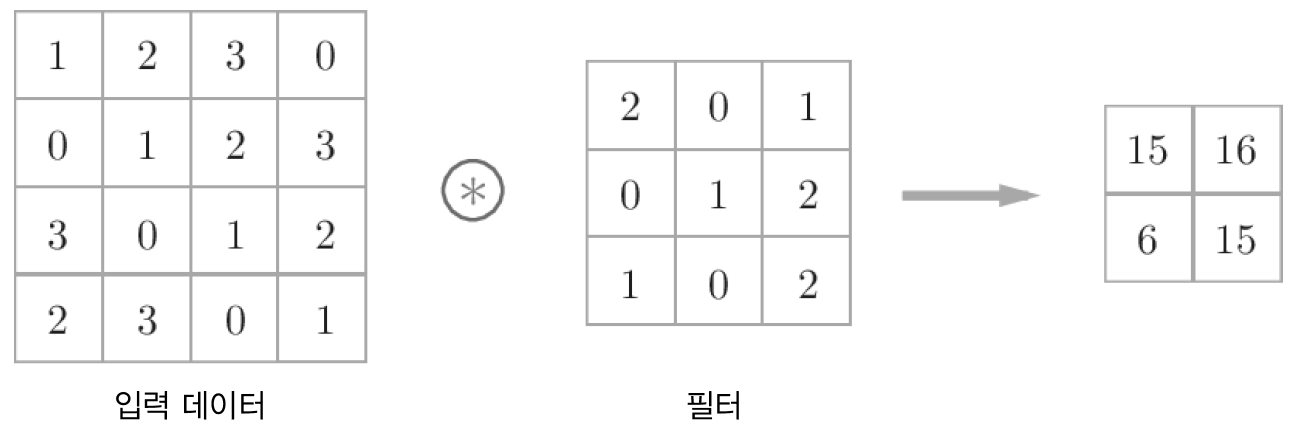

- 이미지 처리에서 말하는 필터 연상에 해당
- ex) 입력데이터는 (4,4), 필터는 (3,3), 출력은 (2,2)의 형상
- 필터는 커널이라고도 표현

- 합성곱연산은 필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용
- 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합 계산(단일 곱셈-누산, FAM)

[그림 7-4] 합성곱 연산의 계산 순서
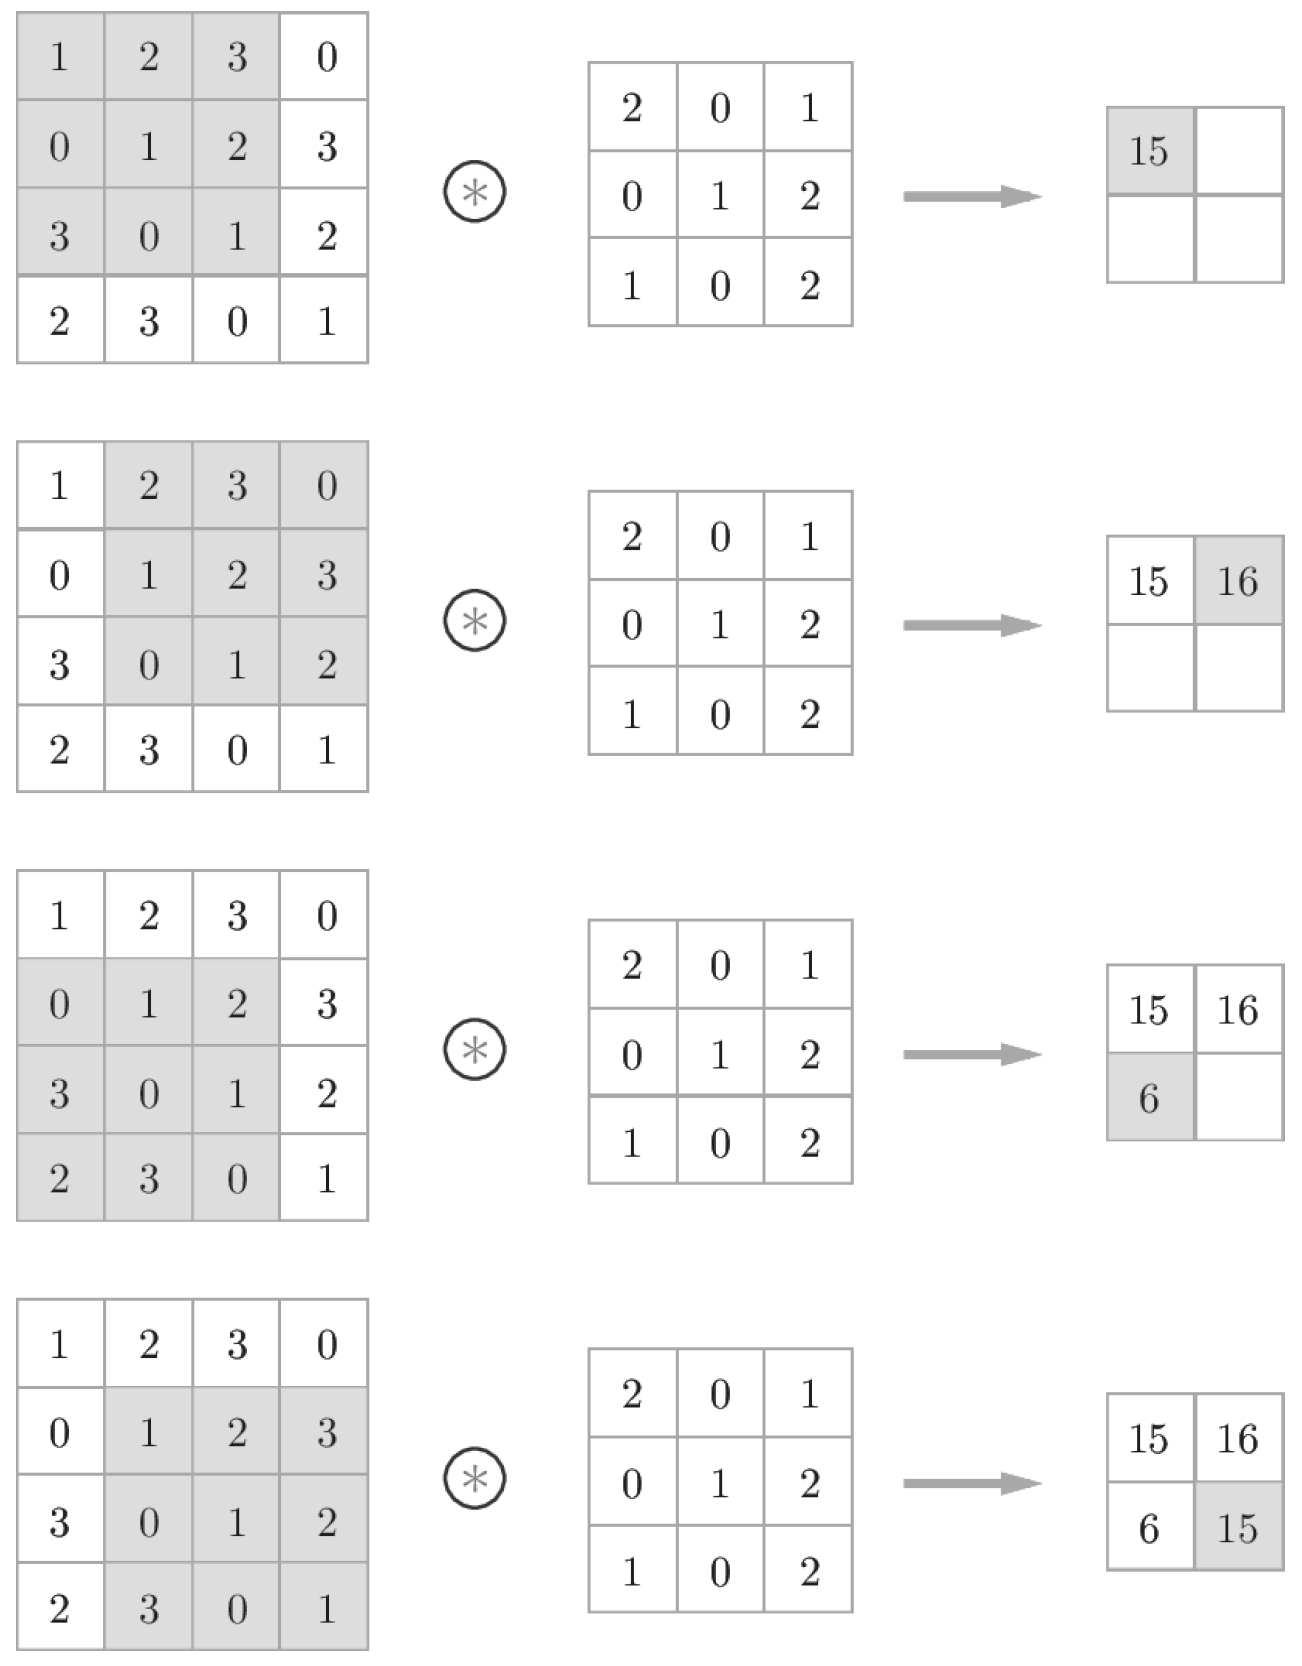
 + 왼쪽 위 원소부터 오른쪽으로 스캔해가며 (1*2 + 2*0 + 3*1 + 0*0 + 1*1 +2*2 + 3*1 + 0*0 + 1*2 =15 의 계산을 수행

 [그림 7-5] 합성곱 연산의 편향: 필터를 적용한 원소에 고정값(편향, bias)를 더한다.
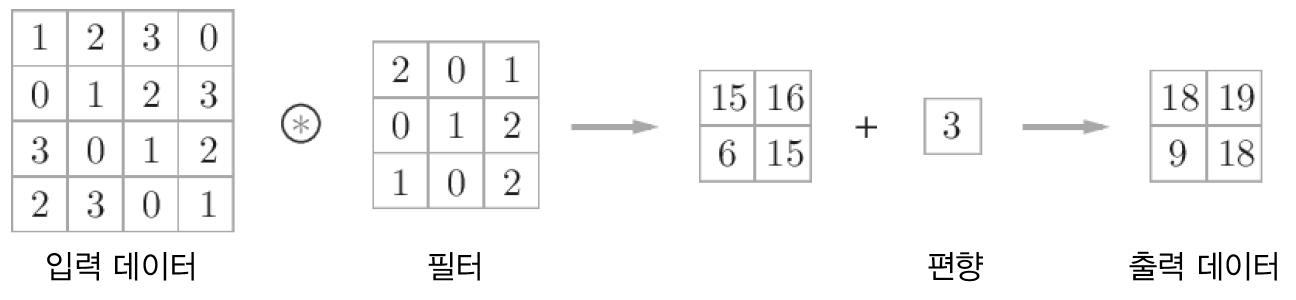

### 7.2.3 패딩
 - 합성곱 연산을 수행하기 전 입력 데이터 주변을 특정 값(ex. 0) 으로 채우는 것
 - 예시 (4,4) 크기의 입력 데이터에 폭이 1인 패딩을 적용
 
 [그림 7-6] 합성곱 연산의 패딩 처리 : 입력 데이터 주위에 0을 채운다(패딩은 점선으로 표시, 그 안의 값 '0'은 생략
 
 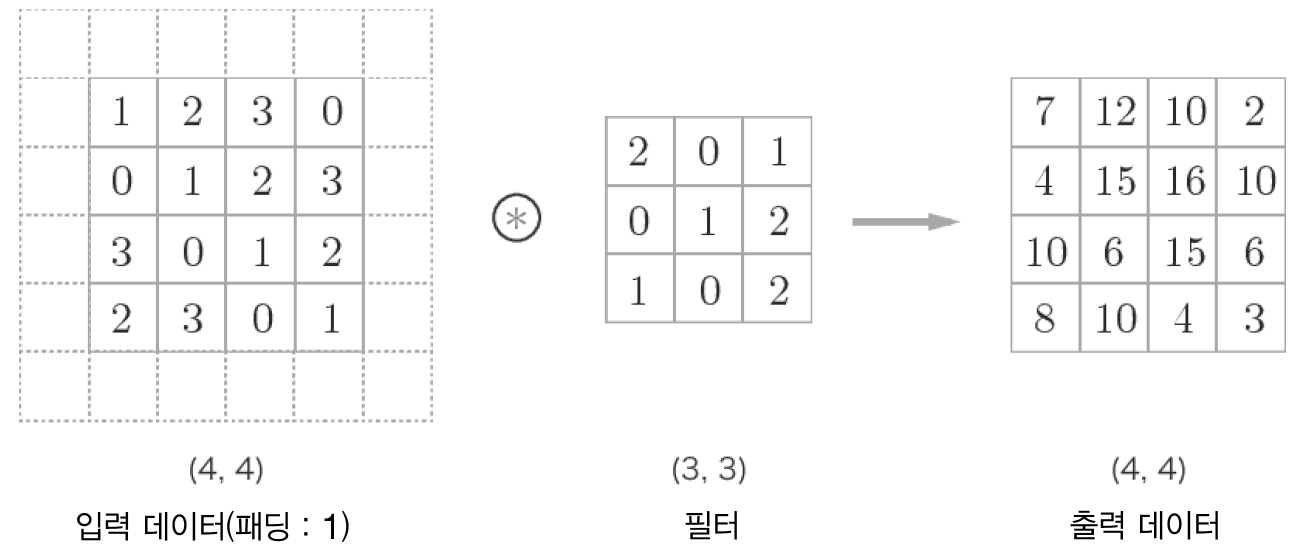
 
 - (4,4) 입력데이터에 패딩을 추가하여 (6,6)이 됨
 
 - 패딩은 출력크기를 조정할 목적으로 사용
     - 연산을 거칠 때 마다 출력의 형상은 계속해서 줄어듦
     - 출력크기가 1이 되어버리면 합성곱연산 불가
     - 입력데이터의 공간적크기를 고정한 채 다음계층에 전달가능

### 7.2.4 스트라이드
 - 필터를 적용하는 위치의 간격
 - 스트라이드(stride)를 2로 하면 필터적용 윈도우가 두 칸씩 이동
 - 우리말로는 보폭
 
 [그림 7-7] 스트라이드가 2인 합성곱 연산
 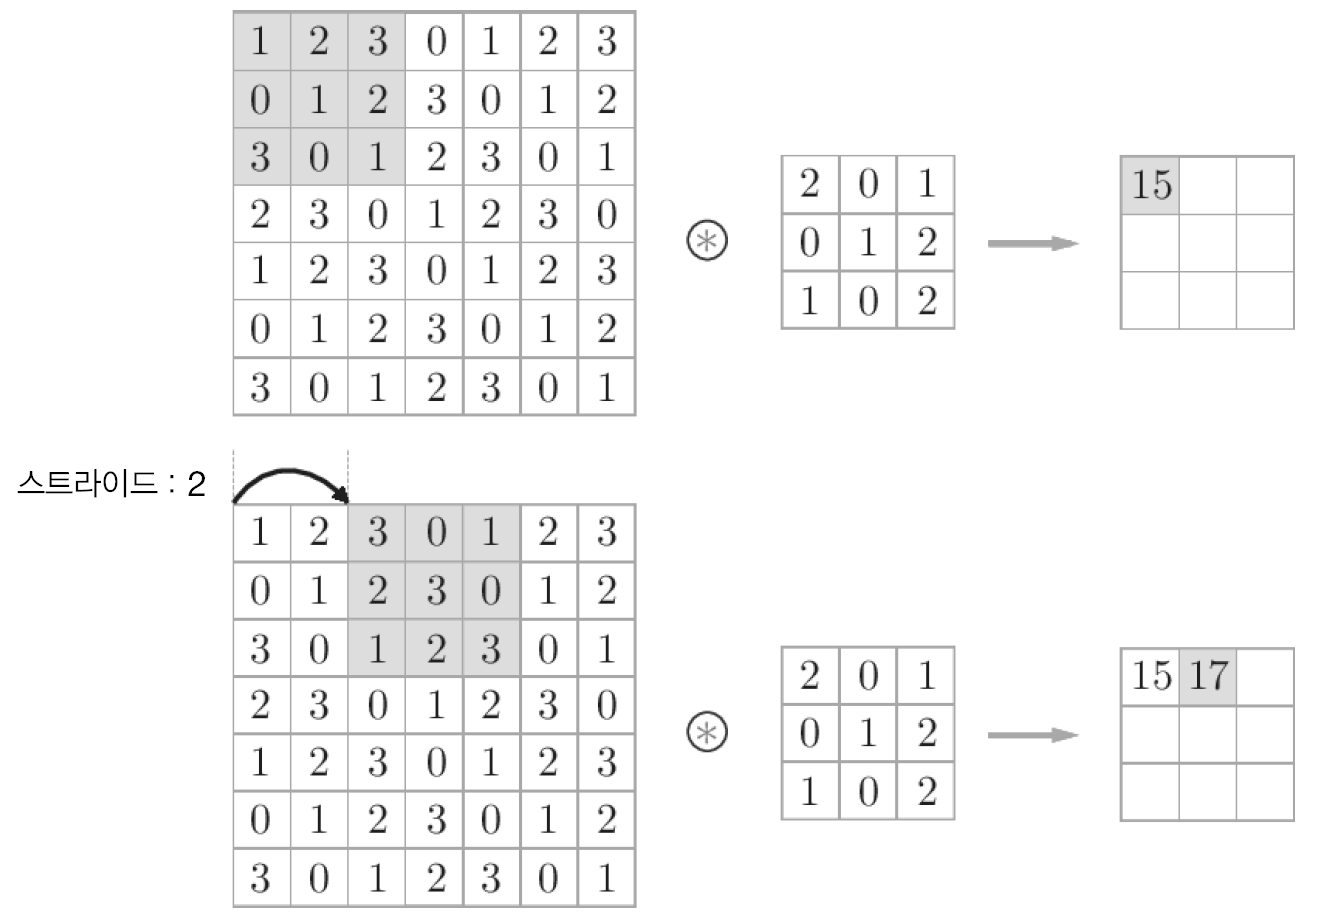
 - 스트라이드를 키우면 출력크기는 작아짐

 - 패딩, 스트라이드, 출력크기의 관계 수식화
     - 입력 크기(H, W)
     - 필터 크기(FH, FW)
     - 출력 크기(OH, OW)
     - 패딩(P)
     - 스트라이드(S)
 - 수식들은 정수로 나누어 떨어지는 값이어여야 함
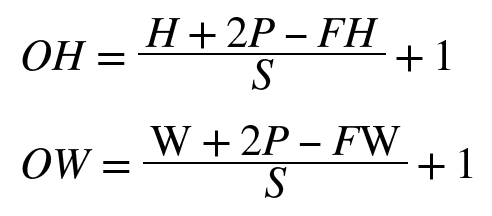 [식 7.1]

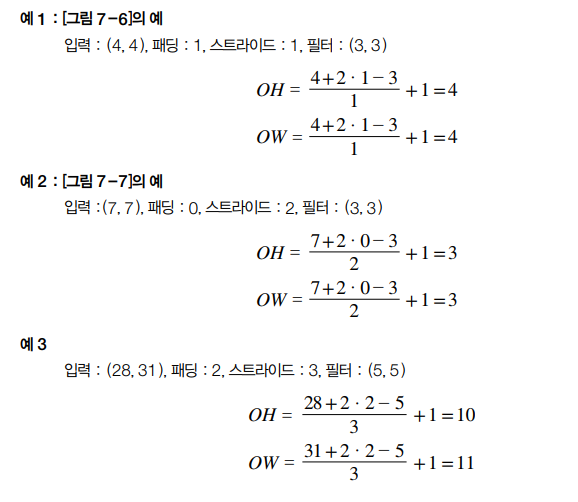

### 7.2.5 3차원 데이터의 합성곱 연산

 - 채널까지 고려한 3차원 데이터(특징맵들이 여러개 있을 때)
     - 입력데이터와 필터의 합성곱 연산을 채널마다 수행
     - 연산수행 결과를 더해서 출력을 얻음
 - [그림7-8] 3차원 데이터 합성곱 연산의 예 [그림 7-9]는 계산 순서
 
 [그림7-8] 3차원 데이터 합성곱 연산의 예
 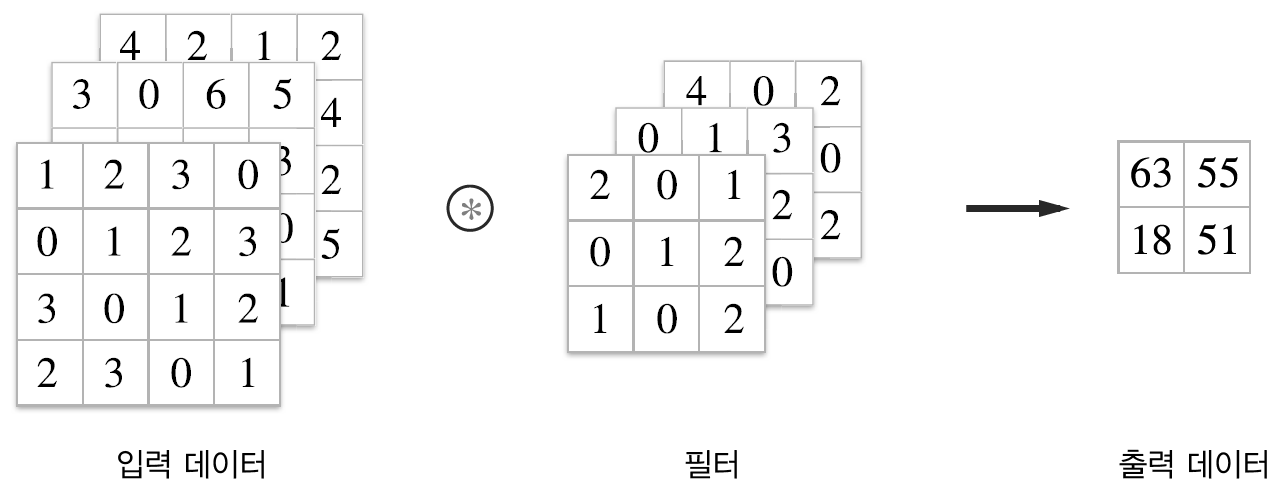

[그림 7-9] 3차원 데이터 합성곱 연산의 계산 순서
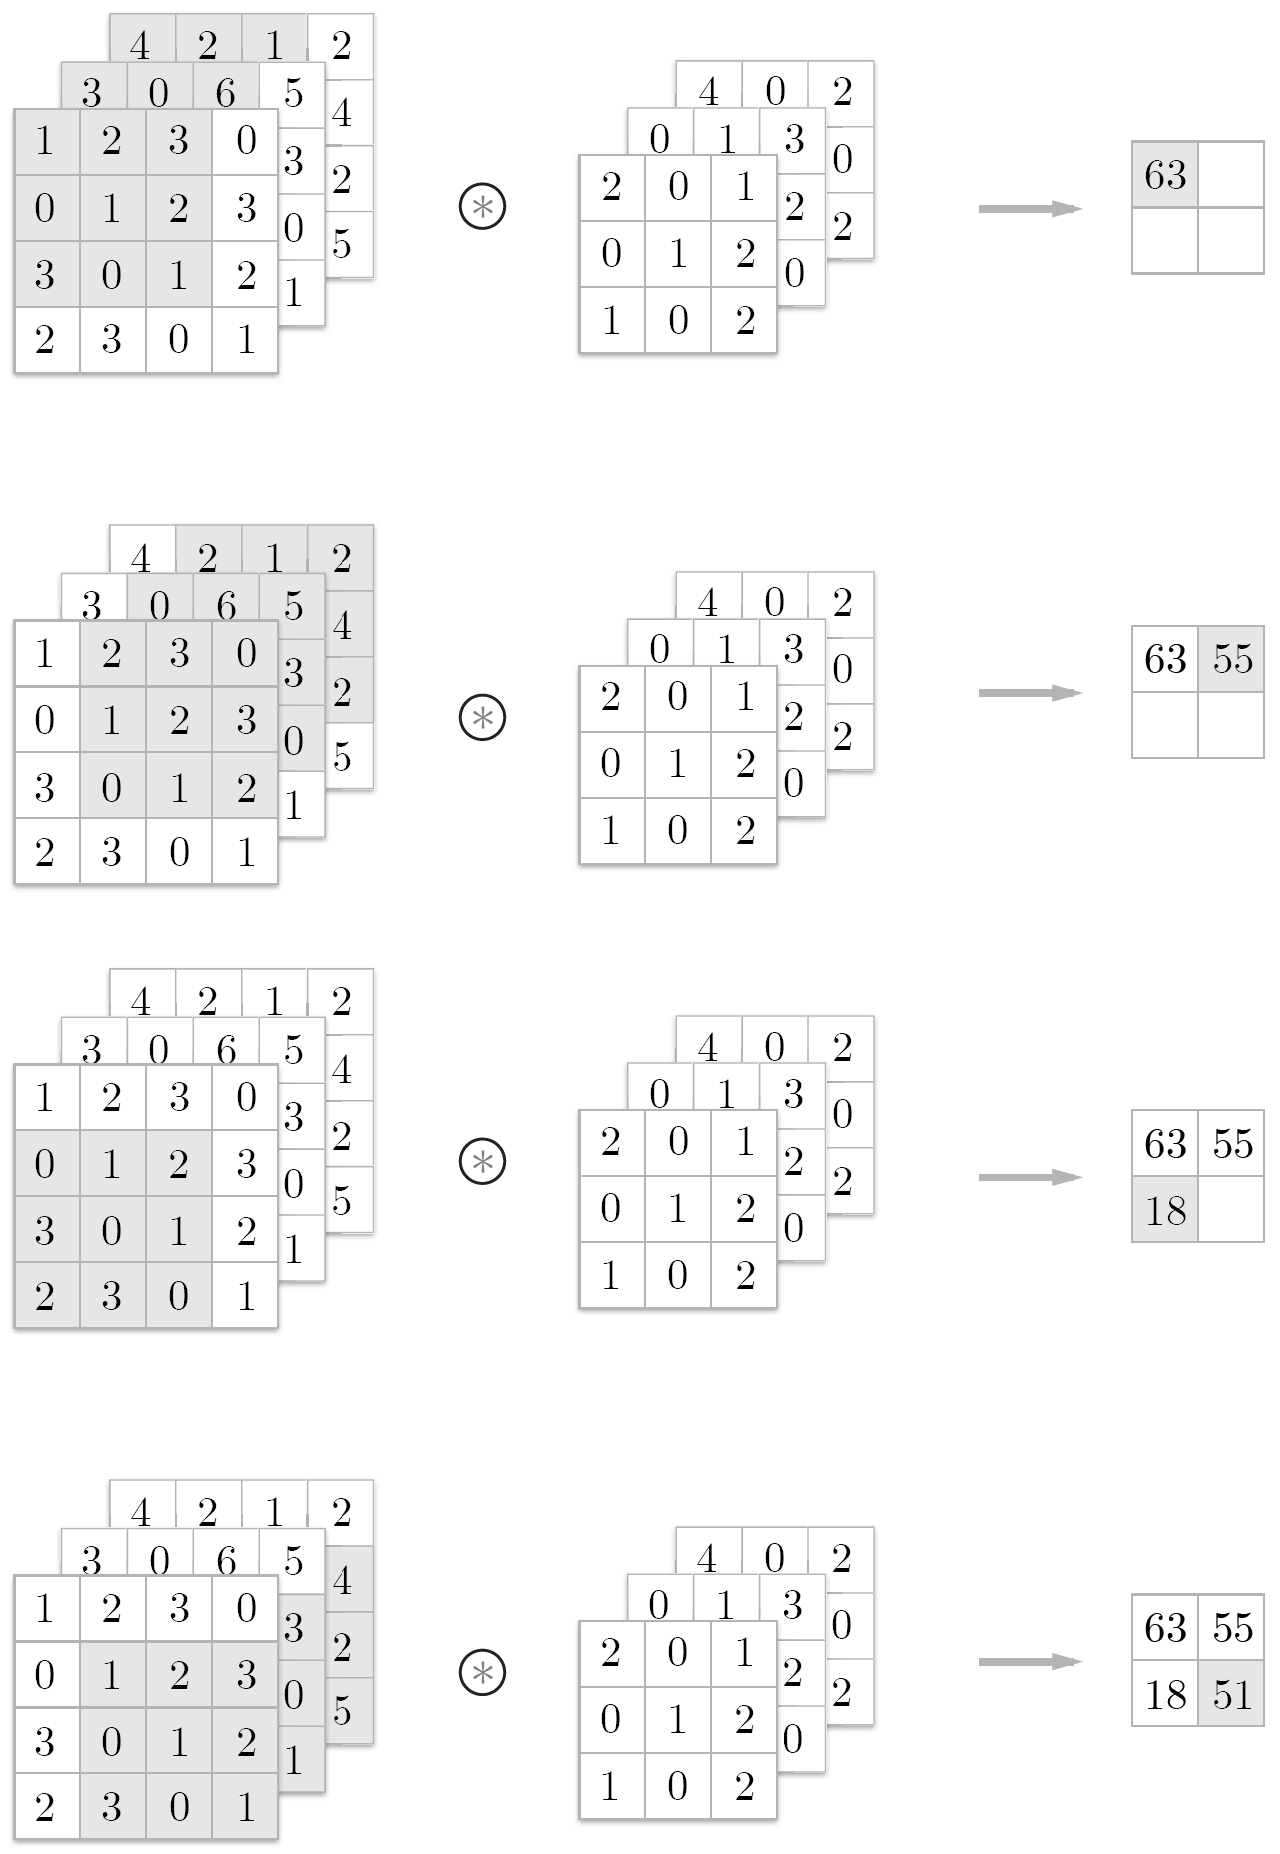

 - 입력데이터의 채널 수와 필터의 채널 수가 같아야 함
 - 필터 자체 크기는 원하는 값으로 설정 가능 (모든 채널의 필터는 같은 크기)

### 7.2.6 블록으로 생각하기
 - 3차원 직육면체로 생각하면 이해 쉬움
 - 3차원 데이터를 배열로 나타낼 때는 체널,높이,너비(C,H,W) / 필터(C, FH, FW)
 - 출력데이터는 한 장의 특징 맵 : 다수의 채널을 내보내려면 필터를 다수 사용
 
 [그림 7-10] 합성곱 연산을 직육체면 블록으로 생각, 블록의 형상에 주의
 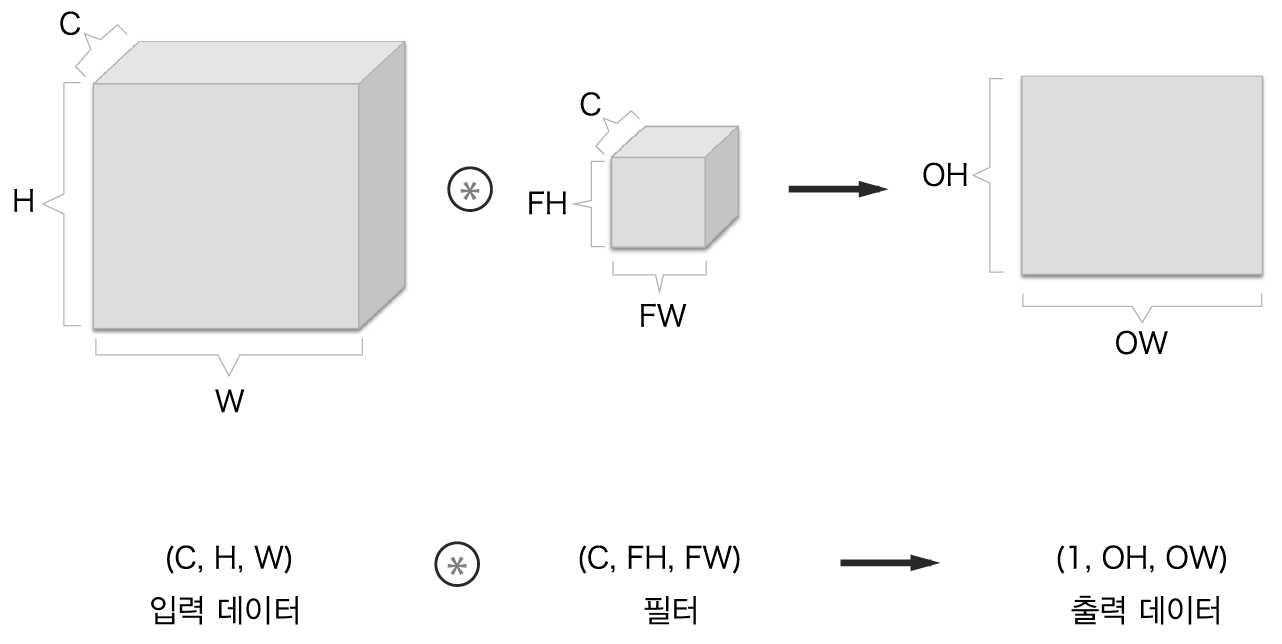
 
  - 필터를 FN개 적용하면 출력 맵도 FN개 생성
  - FN개의 맵을 모으면 (FN, OH, OW)인 블록 완성
  - 합성곱 연산에서는 필터의 수도 고려해야 함
  - 필터의 가중치 데이터는 4차원 데이터(출력채널 수, 입력채널 수, 높이, 너비)

[그림 7-11] 여러 필터를 사용한 합성곱 연산의 예
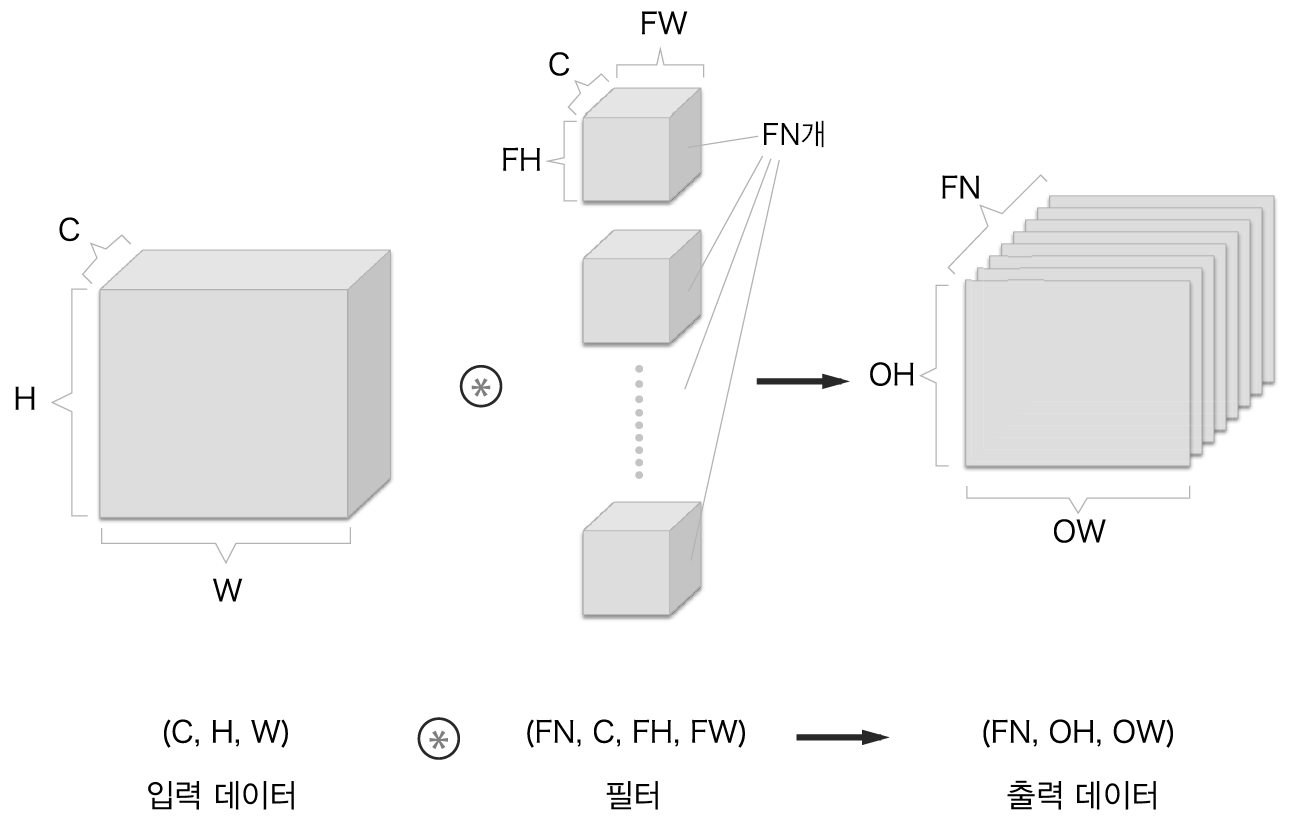

 - 편향을 추가
 [그림 7-12] 합성곱 연산의 처리 흐름(편향 추가)
 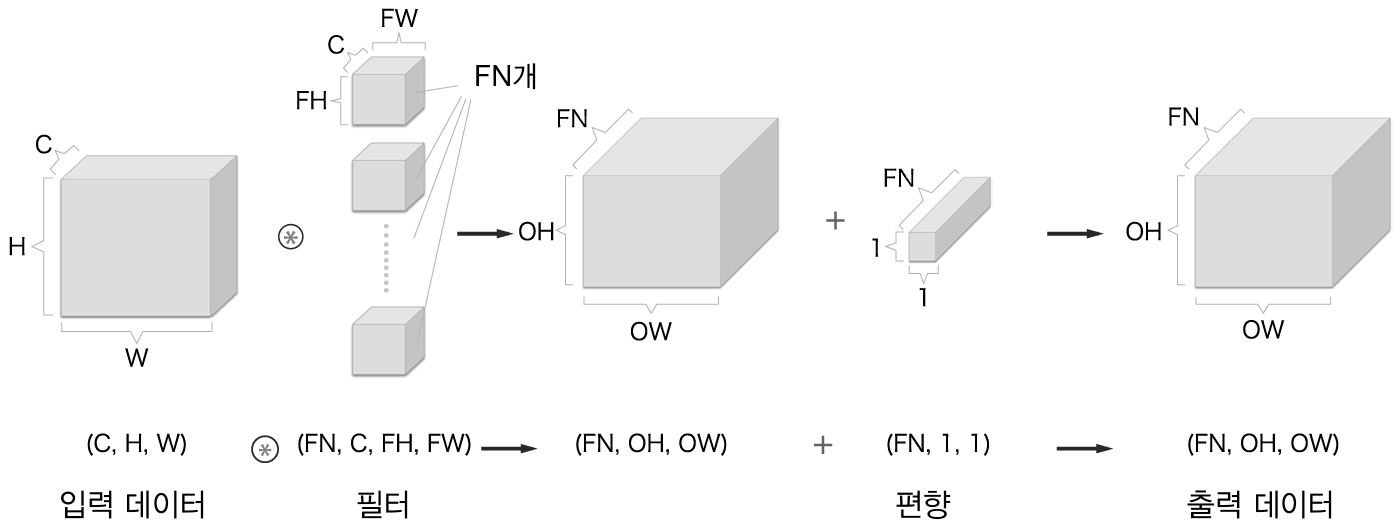

### 7.2.7 배치 처리
 - 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터를 저장
 - (데이터 수, 채널 수, 높이, 너비)
 [그림 7-13] 합성곱 연산의 처리 흐름(배치 처리)
 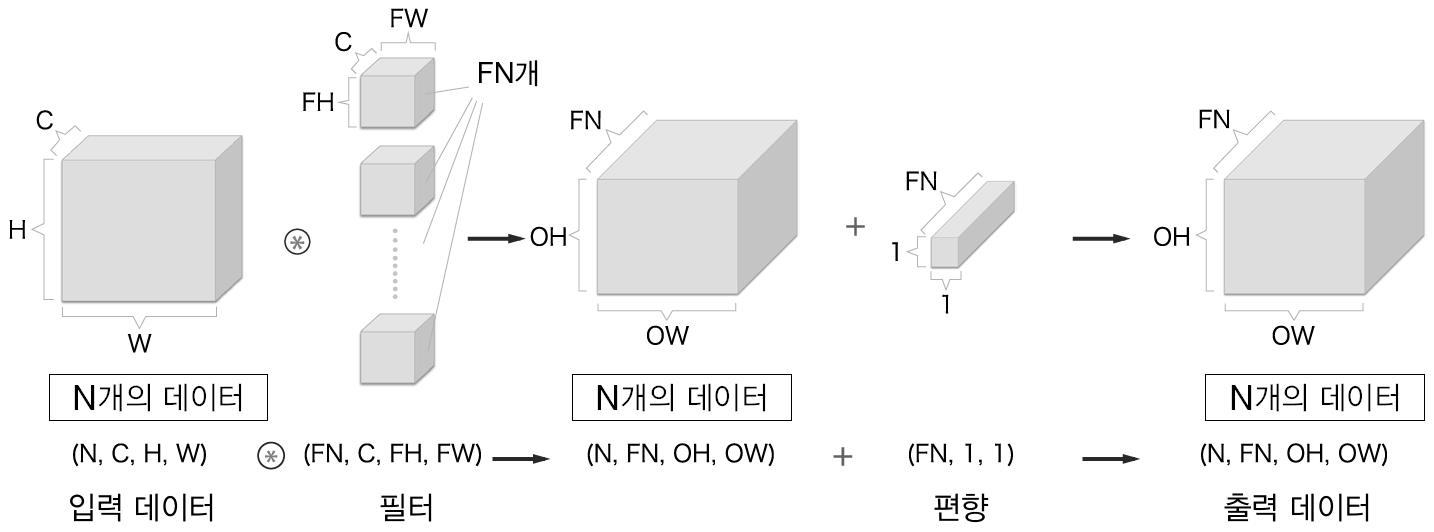

 - 주의 : 신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산수행

## 7.3 풀링 계층
 - 세로, 가로 방향의 공간을 줄이는 연산
 - 최대 풀링(max pooling) : 최대값을 구하는 연산 min, avg등도 있음
 - 풀링의 윈도우 크기와 스트라이드는 같은 값으로 설정하는 것이 보통
 [그림 7-14] 최대 풀링의 처리 순서
 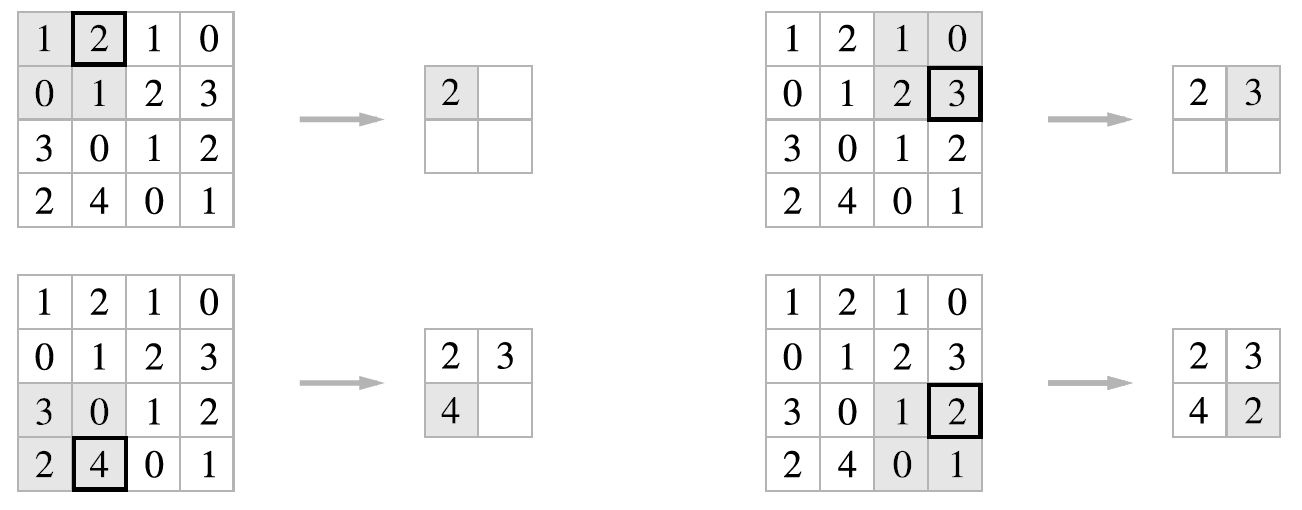

### 7.3.1 풀링 계층의 특징
 - 학습해야 할 매개변수가 없다
 - 채널 수가 변하지 않는다
     - 풀링연산은 채널마다 독립적으로 계산하기 때문에 입력채널 그대로 출력
     
     [그림 7-15]
     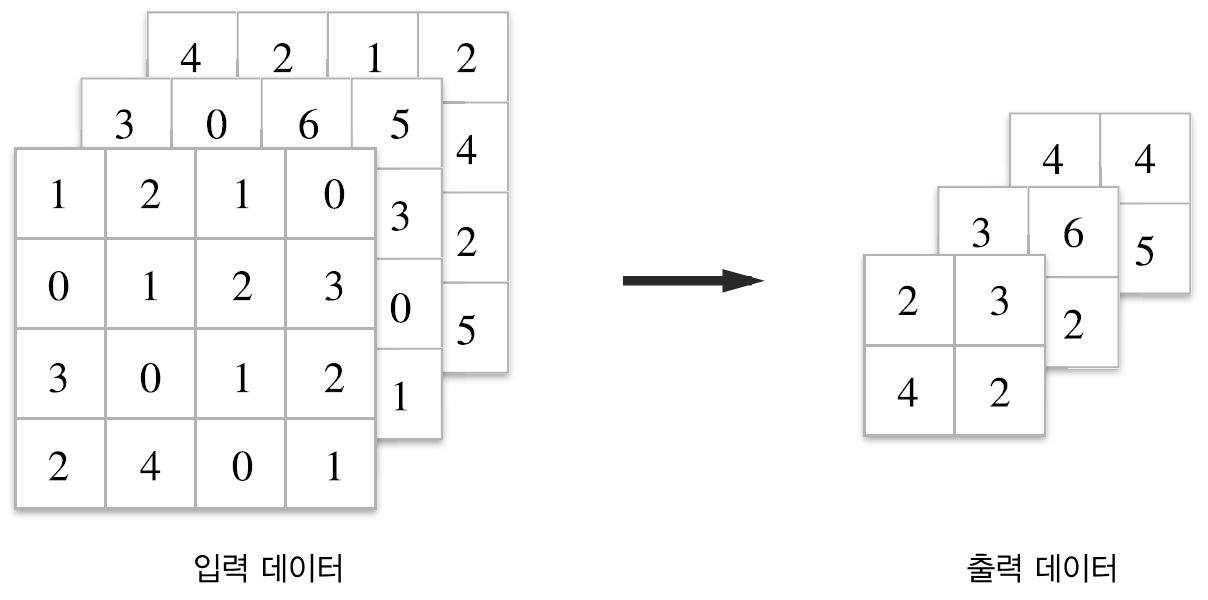

 - 입력의 변화에 영향을 적게 받는다(강건하다)
     - 입력 데이터의 차이를 풀링이 흡수해 사라지게 함
     
     [그림 7-16] 입력 데이터가 가로로 1원소만큼 어긋나도 출력은 같다(데이터에 따라서 다를 수도 있다...)

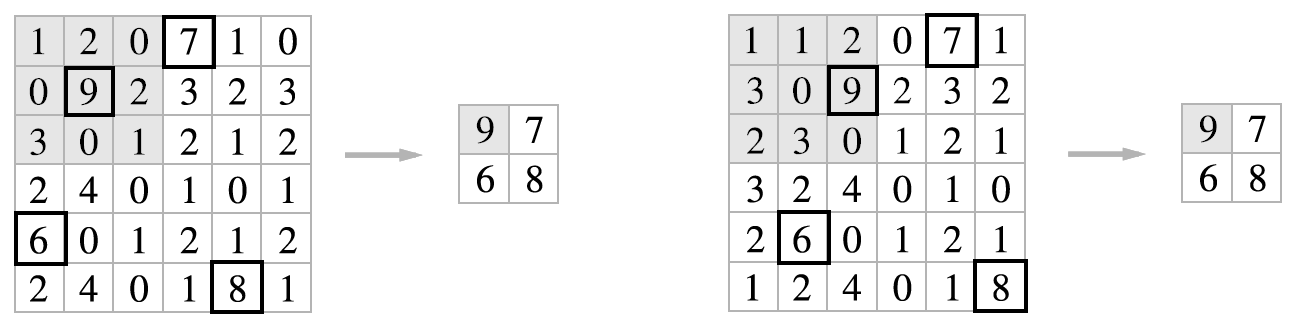

## 7.4 합성곱/풀링 계층 구현하기
    - 파이썬으로 구현

### 7.4.1 4차원 배열

(10, 1, 28, 28) : 
높이 28 너비 28 채널 1개인 데이터가 10개

In [1]:
import numpy as np
x = np.random.rand(10, 1, 28, 28) # 무작위로 데이터 생성
x.shape

(10, 1, 28, 28)

In [2]:
x[0].shape

(1, 28, 28)

In [3]:
x[1].shape

(1, 28, 28)

In [5]:
x[0, 0].shape # or x[0][0]

(28, 28)

### 7.4.2 im2col로 데이터 전개하기
 - for문 대신 im2col 함수 사용하여 간단하게 구현
 - 3차원 데이터에 im2col 적용하면 2차원 행렬로 바뀜
 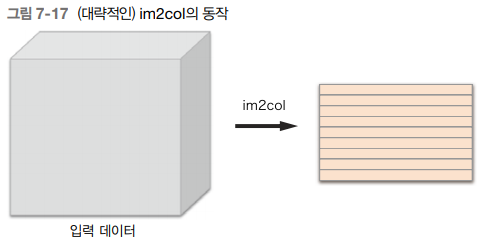
 
 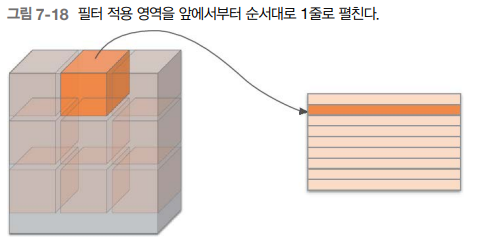

- 실제 상황에서는 필터 적용 영역이 겹치는 경우가 대부분
- 필터 적용 영역이 겹치게 되면 im2col로 전개한 후의 원소 수가 원래보다 많아짐(메모리 더 많이 소비)
- 컴퓨터는 큰 행렬을 만들어 계산하는 데 탁월해 효율을 높일 수 있음(선형 대수 라이브러리 등)

- im2col 입력데이터 전개 후 합성곱 계층 필터 1열전개하고 행렬곱 계산
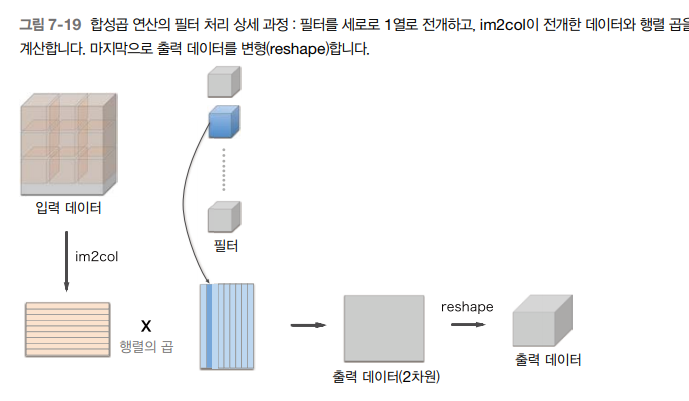


[그림 7-19]와 같이 im2col 방식으로 출력한 결과는 2차원 행렬, CNN은 데이터를 4차원 배열로 저장, 2차원인 출력 데이터를 4차원으로 변형(reshape)합니다.

### 7.4.3 합성곱 계층 구현하기
- im2col의 인터페이스
``` im2col(input_data, filter_h, filter_w, stride=1, pad=0) ```

아래는 im2col함수를 구현

In [6]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).
    
    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [8]:
# im2col을 사용하여 구현

import sys, os
sys.path.append('/deep-learning-from-scratch')
# from common.util import im2col 밑시딥 github source 확인
 
x1 = np.random.rand(1, 3, 7, 7) # 데이터 수, 채널 수, 높이, 너비
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)
 
x2 = np.random.rand(10, 3, 7, 7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


 - 두 가지 경우 모두 2번째 차원의 원소는 75개
    - 필터의 원소 수와 같음 (채널3, 5*5 데이터)
 - 배치크기가 1일 때는 (9, 75) 10일 때는 10배인 (90, 75)

In [9]:
# 합성곱 계층 구현 - Convolution 클래스
 
class Convolution:
  def __init__(self, W, b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad
 
  def forward(self, x):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = x.shape
    out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
    out_w = int(1 + (W +2*self.pad - FW) / self.stride)
 
    col = im2col(x, FH, FW, self.stride, self.pad) # 입력데이터 전개
    col_W = self.W.reshape(FN, -1).T # 필터 전개
    out = np.dot(col, col_W) + self.b
 
    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
 
    return out

 - reshape 두 번째 인수 -1로 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 묶어줌
 - transpose함수를 이용해 출력데이터를 적절한 형상으로 바꾸어 줌
     - 인덱스를 지정하여 축의 순서 변경
 
[그림 7-20] 넘파이의 transpose 함수로 축 순서 변경하기 : 인덱스(번호)로 축의 순서를 변경한다.
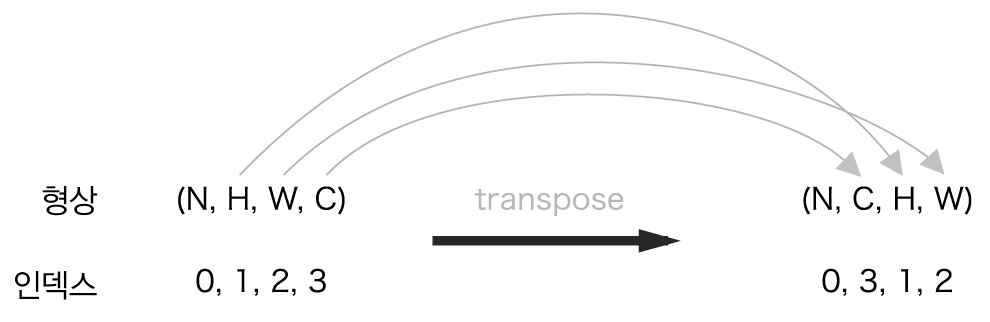

 - 역전파에서는 im2col 대신 col2im 함수 사용

In [10]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 중간 데이터（backward 시 사용）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 가중치와 편향 매개변수의 기울기
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

### 7.4.4 풀링 계층 구현하기
 - 풀링의 경우에는 채널이 독립적이라는 점이 합성곱계층과 다른 점 
 - 전개 후 최대값을 구하고 적절한 형상으로 바꾸어줌
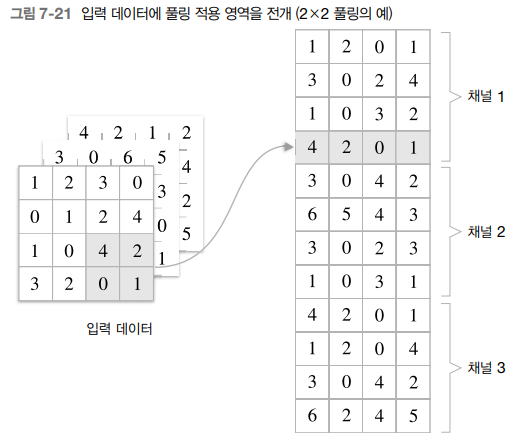

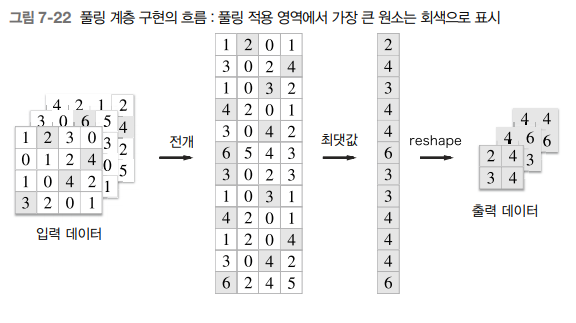

- 이상이 풀링 계층의 forward 처리 흐름, 다음은 파이썬 코드로 구현
    - 풀링 계층 구현의 세 단계
        1. 입력데이터 전개
        2. 행별 최댓값 구함
        3. 적절한 모양으로 성형

In [11]:
# 풀링 계층 구현
 
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad
 
  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)
 
    # 전개 (1)
    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h*self.pool_w)
 
    # 최댓값 (2)
    out = np.max(col, axis=1) # 각 행마다 최댓값 도출
 
    # 성형 (3)
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
 
    return out

- 최대값 계산에는 np.max() 사용
- np.max(x, axis=1)과 같이 쓰면 x의 1번째 차원의 축마다 최대값 구함
- axis = 축

In [12]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

## 7.5 CNN 구현하기
 - [그림 7-23] 단순한 CNN의 네트워크 구성
 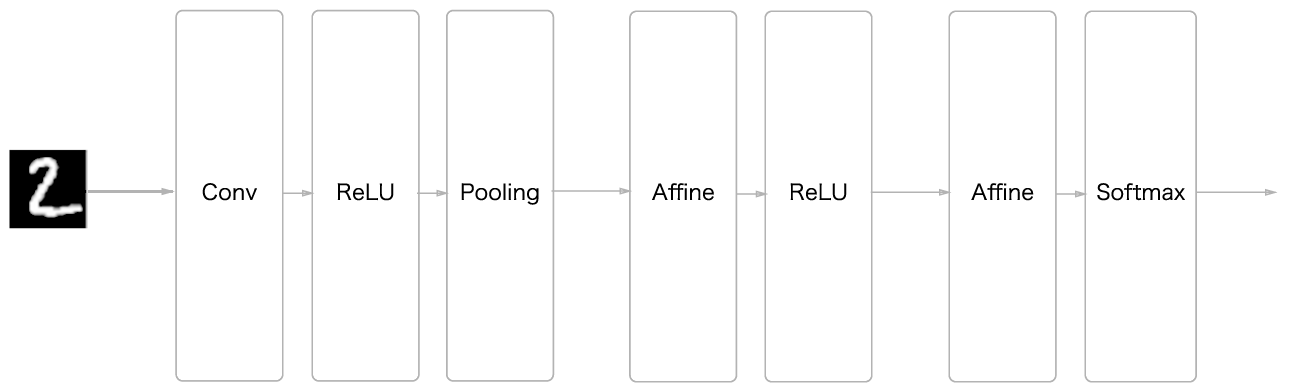
 
  + conv - relu - pool - affine - relu - affine - softmax 형태
  + 초기화(__ init __)에서 받는 파라미터(인수)
    + input_dim : 입력 데이터(채널 수, 높이, 너비)의 차원
    + conv_param : 합성곱 계층의 하이퍼파라미터, 딕셔너리의 키는 다음과 같음
        - filter_num : 필터 수
        - filter_size : 필터 크기
        - stride : 스트라이드
        - pad : 패딩
    + hidden_size : 은닉층(완전연결)의 뉴런 수
    + output_size : 출력층(완전연결)의 뉴런 수
    + weight_init_std : 초기화 때의 가중치 표준편차
 - 합성곱계층의 하이퍼파라미터는 딕셔너리 형태로 주어짐

In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
# from common.layers import *
# from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망
    
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]


``from common.layers import *
from common.gradient import numerical_gradient ```
- 을 위한 코드

In [15]:
# coding: utf-8


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # 합성곱 계층은 4차원, 완전연결 계층은 2차원  

        # 시험할 때 사용할 평균과 분산
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward 시에 사용할 중간 데이터
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 중간 데이터（backward 시 사용）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 가중치와 편향 매개변수의 기울기
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx
    
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

## 7.6 CNN 시각화하기
### 7.6.1 1번째 층의 가중치 시각화하기
 - 조금 전 MNIST 데이터셋의 간단한 CNN학습의 1번째 층의 합성곱 계층의 가중치는 (30,1,5,5)[필터 30개, 채널1개 5x5 크기]
 - 채널이 1개라는 것은 필터를 1채널의 회색조 이미지로 시각화 할 수 있다는 뜻

학습 전의 필터 : 


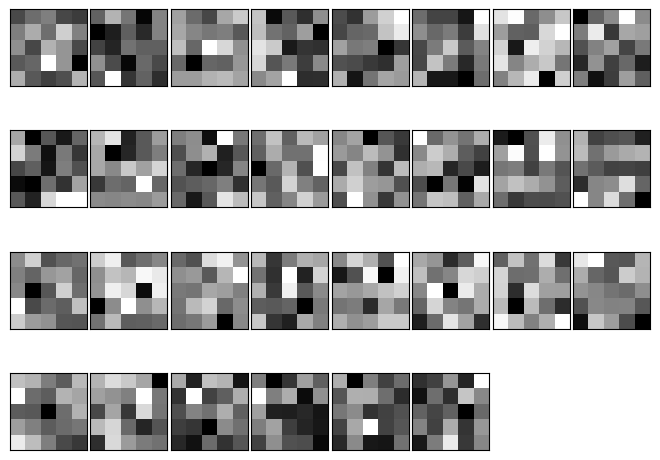

학습 후의 필터 : 


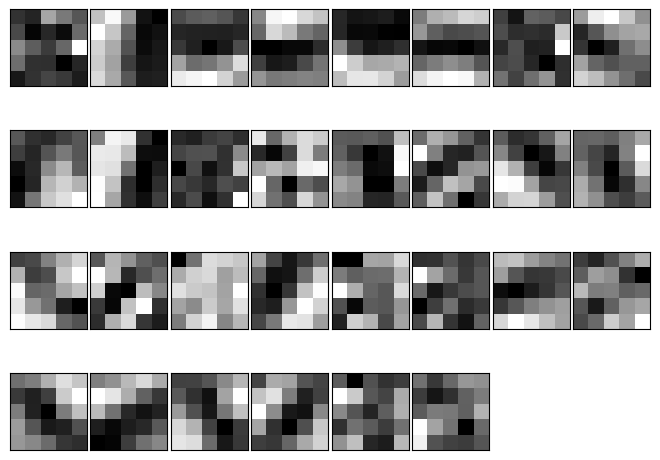

In [20]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
# from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
print("학습 전의 필터 : ")
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])
print("학습 후의 필터 : ")
# 학습된 가중치
network.load_params("./ch7_model/params.pkl")
filter_show(network.params['W1'])


- [그림 7-24 == 위 코드 output] 학습 전과 후의 1번째 층의 합성곱 계층의 가중치 : 가중치의 원소는 실수이지만, 이미지에서는 가장 작은 값(0)은 검은색, 가장 큰 값(255)은 흰색으로 정규화 하여 표시함
- 학습 전 필터는 무작위로 초기화되고 있어 흑백의 정도에 규칙성이 없음
- 학습 후 필터는 규칙성을 가진 이미지
- 규칙성있는 필터는 엣지(색상이 바뀐 경계선)와 볼륨(국소적으로 덩어리진 영역) 등을 보고 있음
- 합성곱 계층의 필터는 엣지나 블롭등의 원시적인 정보 추출가능, 뒤 계층에 전달

[그림 7-25] 가로 엣지와 세로 엣지에 반응하는 필터 : 출력 이미지 1은 세로에지에 흰 픽셀이 나타나고, 출력 이미지 2는 가로 엣지에 흰 픽셀이 많이 나온다.
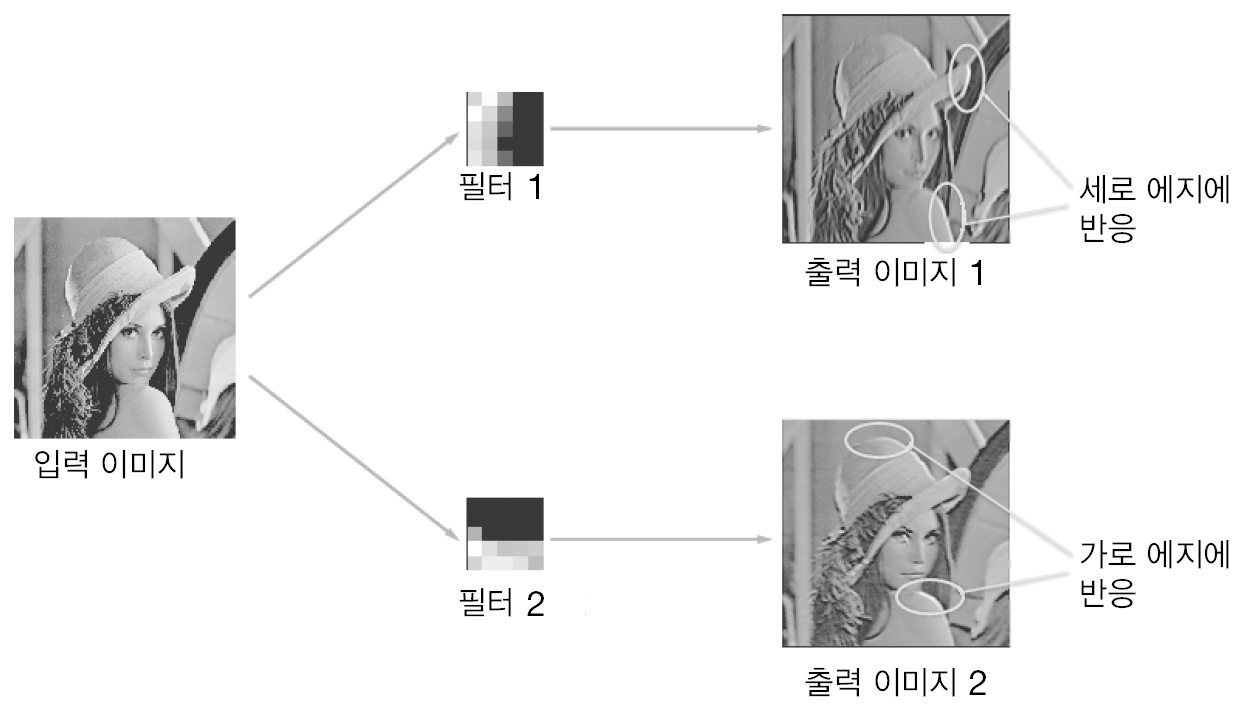




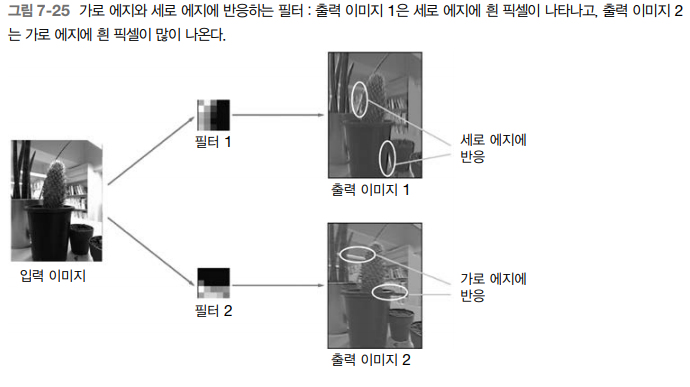

### 7.6.2 층 깊이에 따른 추출 정보 변화
 - 계층이 깊어질수록 추출되는 정보는 더 추상화 됨
 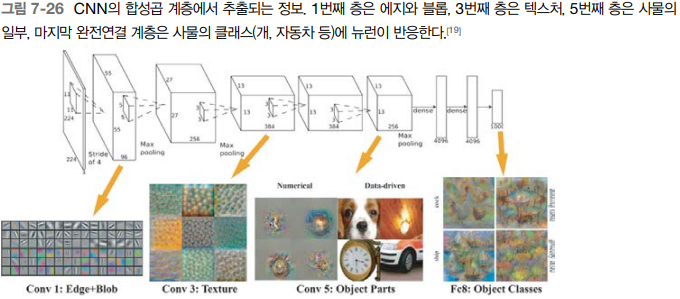

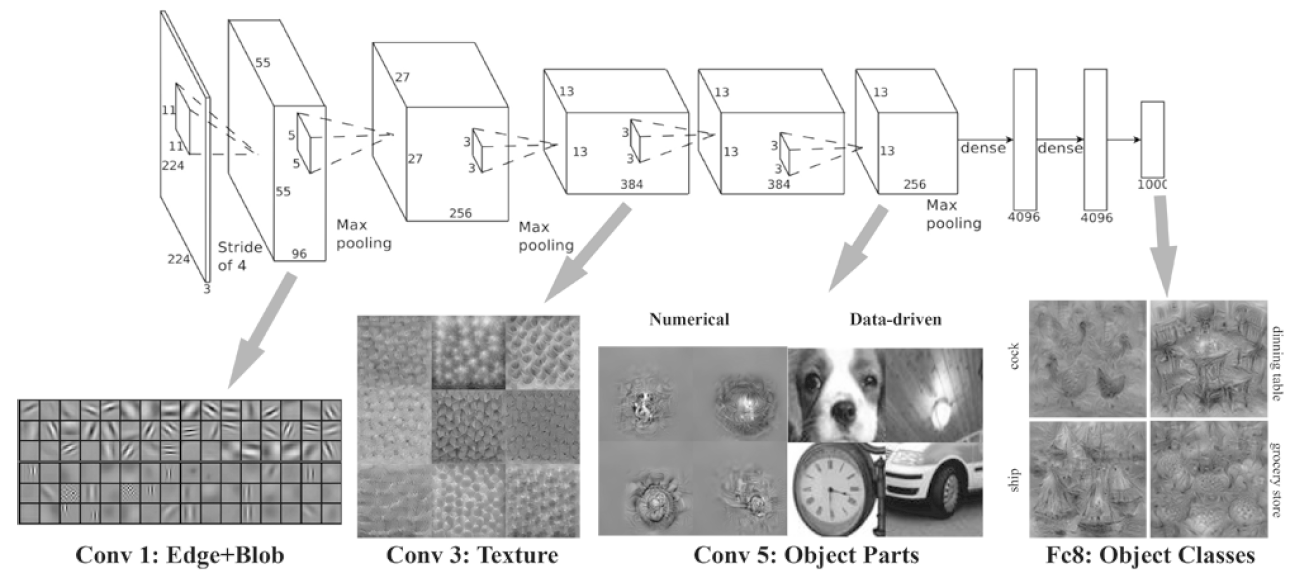

- 처음 층은 단순화 엣지에 반응하고, 이어 텍스처에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화
- 즉, 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급'정보로 변화 -> 사물의 '의미'를 이해하도록 변화하는 것

## 7.7 대표적인 CNN
 - LeNet과 AlexNet

### 7.7.1 LeNet
 - 손글씨 숫자 인식 네트워크 (1998)
 - 합성곱 계층과 풀링계층(단순히 원소를 줄이기만 하는 서브샘플링 계층)
 - 마지막으로 완전연결계층 거치면서 결과 출력
    - LeNet과 현재 CNN 비교
        - 활성화 함수 : LeNet(sigmoid) / 현재(ReLU)
        - 데이터 크기 줄이기 : LeNet(서브샘플링, 중간데이터 크기 줄임) / 현재(MaxPooling)
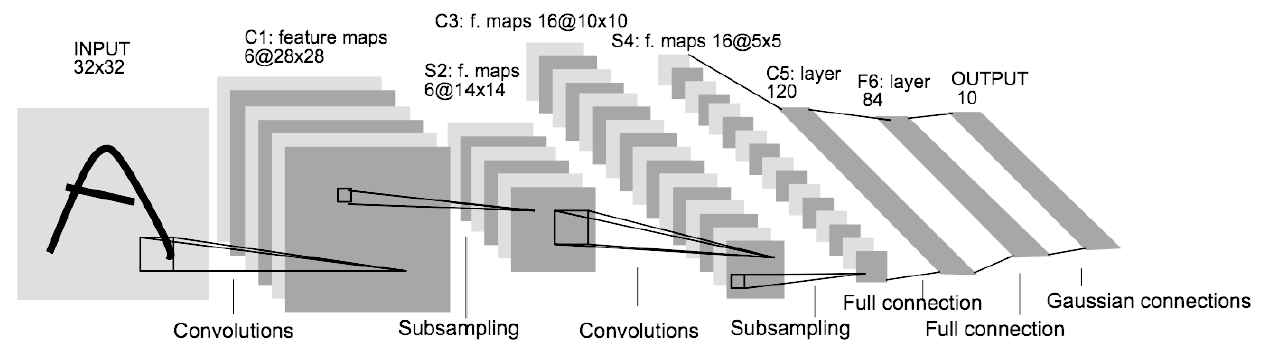

### 7.7.2 AlexNet
                - 2012년 발표 (https://paperswithcode.com/method/alexnet)
 - LeNet과 비교해 바뀐 점
     - 활성화 함수로 ReLU 사용
     - LRN이라는 국소적 정규화 실시하는 계층 이용
     - 드롭아웃 사용
     - 2개의 GPU로 병렬연산을 수행하기 위해서 병렬적인 구조로 설계되었다는 점이 가장 큰 변화
 - 병렬 계산에 특화된 GPU 보급, 빅데이터 발달이 딥러닝 발전의 큰 원동력
 
  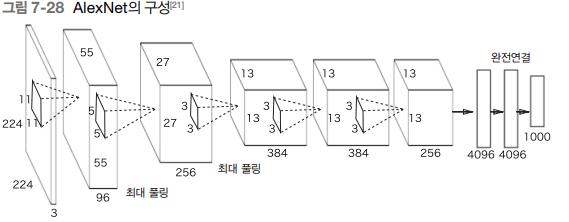
  
 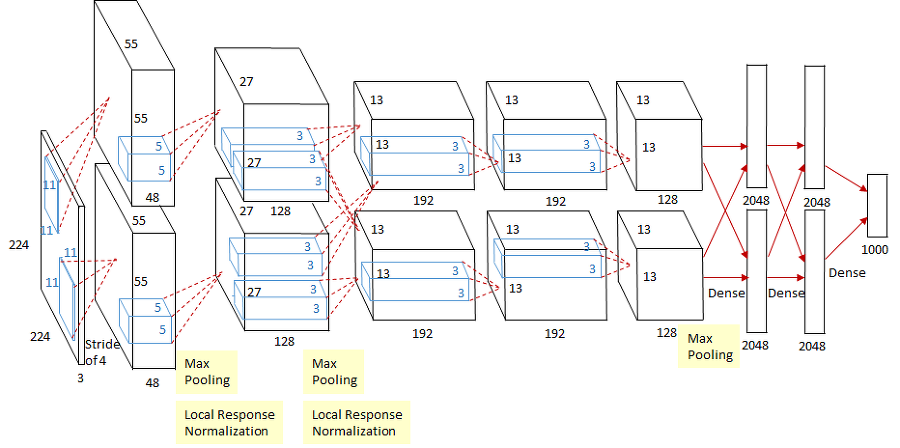
 


#### 추가적으로 최근 CNN
 - 책에 없는 내용으로 작성자가 작성
  + 참고링크(https://yeong-jin-data-blog.tistory.com/entry/%EC%82%AC%EC%A0%84%ED%95%99%EC%8A%B5-%EB%AA%A8%EB%8D%B8-CNN)
  + 참고링크(https://rubber-tree.tistory.com/entry/AI%EB%94%A5%EB%9F%AC%EB%8B%9D-CNN-Network-layer-%EB%AA%A8%EB%8D%B8%EB%93%A4-AlexNet-GoogLeNet-ResNet)
  
  ##### GoogLeNet
   - CNN의 성능을 향상 시키기위해 layer를 늘리자
   - layer 수를 늘리는 것 뿐만 아니라 unit수도 늘리자
   - 깊고 넓은 네트워크(파라미터증가)를 형성 오버피팅, 연산량 증가 문제 생성
   - > 이것들을 해결하기 위해 inception(1x1) 개념 사용
   
  ##### ResNet
   - deep한 네트워크를 위해 layer만 늘린다고 성능이 좋아지지 않는다. (즉, degradation 발생, trainning도 잘되고 test도 잘되지만 성능이 안나옴)
   - 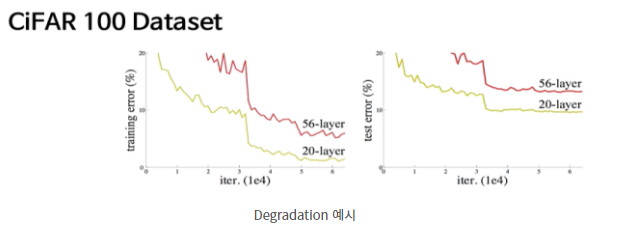
   - > Residual learning building block 
       - 입력 x, 입력 x값에 출력 값을 더해 내보낸다
       - 유일한 제약 조건: 입력과 출력의 dimension을 맞춰야 한다
   - > Deeper bottle architecture
       - 1x1 convolution을 추가
       - 입력과 출력의 dimension을 맞춰야 하므로 마지막에 1x1, 256layer 추가
       - 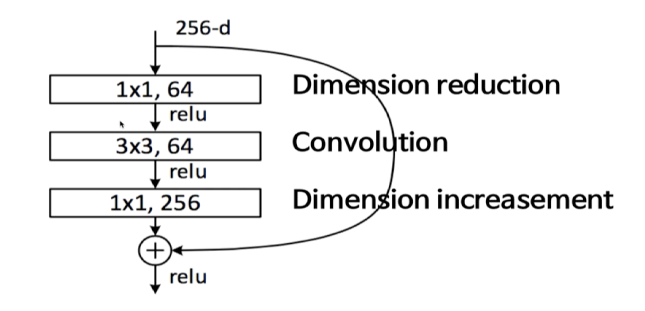
   - 총 Layer : 152개
   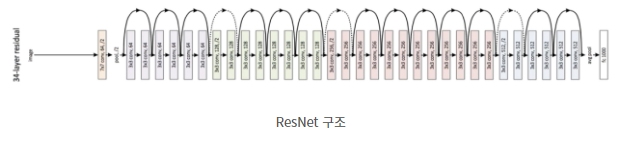
   
###### 앞으로의 과제
 - Layer를 100개까지는 학습이 잘되는 것이 ResNet으로 확인
 - 그 이상을 올리는 것을 계속 시도 및 발전이 필요 (발전 된것으로 알고 있음)
 
 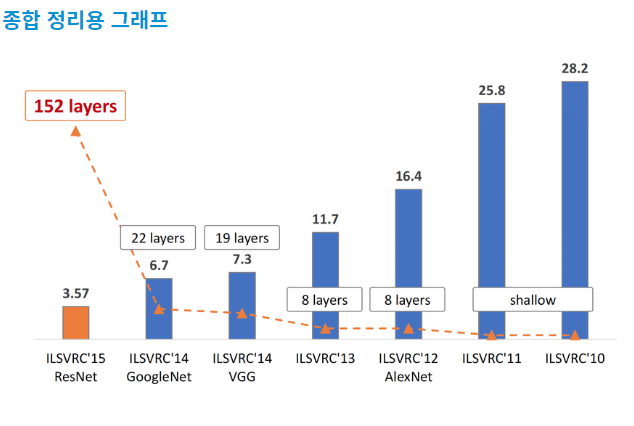

## 7.8 정리
  (이미지 분야에서는 CNN은 거의 다 쓰임)
 
 + CNN은 지금까지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.
 + 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
 + CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.
 + 대표적인 CNN에는 LeNet AlexNet이 있다.
 + 딥러닝의 발전에는 빅데이터와 GPU가 크게 기여했다.